## Box Office Insights: Identifying Successful Movie Trends for Microsoft's New Movie Studio

* Student name: Michelle Mwendwa
* Student pace: part time


## Project Overview

The project involves analyzing data from various sources to help Microsoft's new movie studio identify the most successful film genres, key factors that contribute to a movie's success, and audience demographics. The project aims to provide actionable insights and recommendations to create a movie portfolio and execute marketing strategies for the studio's success in the highly competitive movie industry.

## Business Understanding

Microsoft is launching a new movie studio but lacks knowledge of successful films in the industry. The challenge is to explore the market and identify popular genres, ratings, actors, directors, and factors that contribute to a movie's success. This will enable the studio to make informed decisions when creating its own movies and increase its chances of success in a highly competitive industry.


## Goals

1. Identify successful movie genres and their audience demographics
2. Determine key factors contributing to a movie's success
3. Develop a strategy for creating a movie portfolio and executing marketing campaigns based on the data analysis.


## Check the data

In [1]:
# Import standard packages that will be used to analyze, clean and create visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the datasets

rt_movie_info = pd.read_csv("rt.movie_info.tsv.gz", sep='\t', encoding='unicode_escape')
movie_budgets = pd.read_csv("tn.movie_budgets.csv.gz")

tmdb_movies = pd.read_csv("tmdb.movies.csv.gz", index_col=0)

In [3]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## Cleaning the datasets

In [6]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Clean and transform the movie_budgets dataset
# We start by removing the commas and dollar sign and transform the product_budget, domestic_gross and worldwide_gross to floats 
# so we are able to get statistical measures 
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


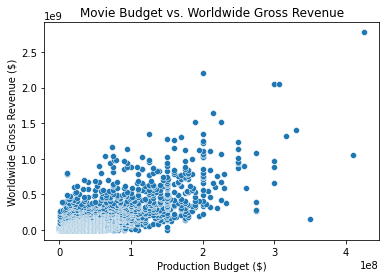

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot scatter plot of movie budget vs. worldwide gross revenue to see the correlation
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Movie Budget vs. Worldwide Gross Revenue')
plt.show()

plt.savefig('my_graph.png')


The scatter plot above shows that there is a positive correlation between the production budget and worldwide gross revenue. Meaning that movies with higher production budgets tend to have higher worldwide gross revenues. It is important to note that correlation does not mean causation. Consequently there is also a lot of variation in the data, some movies have very high worldwide gross revenues despite having relatively low production budgets, and vice versa.

This scatter plot is useful to identify the outliers or unusual data points that may need further investigation or removal from the dataset. Below we will investigate the outliers to check if they correct and useful in our analysis

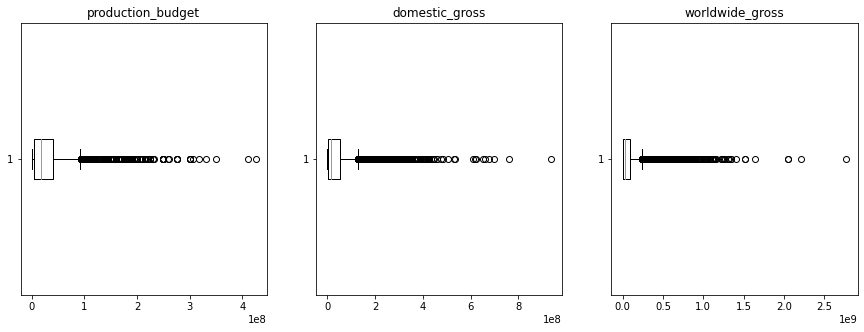

In [9]:
#Let us now check for outliers in the numerical columns
numerical_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Plot boxplots for the numerical variables
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    axs[i].boxplot(movie_budgets[col], vert=False)
    axs[i].set_title(col)
plt.show()

From the above boxplots we can see that there are extreme outliersfor both the highest earnings and lowest earnings lets investigate these outliers further to see if we should drop them or they are correct and required for ouranalysis.

In [10]:
# Sort the dataset by production_budget in ascending order
movie_budgets = movie_budgets.sort_values(by='production_budget', ascending=True)

# Show the movie with the lowest production_budget
print(movie_budgets.head(1))

# Show the movie with the highest production_budget
print(movie_budgets.tail(1))

# Sort the dataset by domestic_gross in ascending order
movie_budgets = movie_budgets.sort_values(by='domestic_gross', ascending=True)

# Show the movie with the lowest domestic_gross
print(movie_budgets.head(1))

# Show the movie with the highest domestic_gross
print(movie_budgets.tail(1))

# Sort the dataset by worldwide_gross in ascending order
movie_budgets = movie_budgets.sort_values(by='worldwide_gross', ascending=True)

# Show the movie with the lowest worldwide_gross
print(movie_budgets.head(2))

# Show the movie with the highest worldwide_gross
print(movie_budgets.tail(2))


      id release_date              movie  production_budget  domestic_gross  \
5781  82   2005-08-05  My Date With Drew             1100.0        181041.0   

      worldwide_gross  year  
5781         181041.0  2005  
   id release_date   movie  production_budget  domestic_gross  \
0   1   2009-12-18  Avatar        425000000.0     760507625.0   

   worldwide_gross  year  
0     2.776345e+09  2009  
      id release_date            movie  production_budget  domestic_gross  \
2914  15   1977-10-21  Damnation Alley         17000000.0             0.0   

      worldwide_gross  year  
2914              0.0  1977  
   id release_date                                 movie  production_budget  \
5   6   2015-12-18  Star Wars Ep. VII: The Force Awakens        306000000.0   

   domestic_gross  worldwide_gross  year  
5     936662225.0     2.053311e+09  2015  
      id release_date            movie  production_budget  domestic_gross  \
2914  15   1977-10-21  Damnation Alley         17000000.0  

We obsverve that the outliers are valid values and necessary for our analysis to see the movies performing the best.

In [11]:
#let us now clean the dataset from rt_movie_info
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
rt_movie_info.shape

(1560, 12)

In [13]:
# check for missing values in the columns
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [14]:
#Remove the columns with missing values that are too many and we dont have sufficient data to replace
#Remove columns that we do not necesaarily need in our analysis
#currency, box_office and studio are dropped as we are missing about 80% of the data, the rest are dropped since we wont be using them for analysis
rt_movie_info.drop(["currency", "box_office", "studio", "dvd_date", "writer", "theater_date", "runtime"], axis=1, inplace=True)

In [15]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
# check for missing values in the columns
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [17]:
# Drop the unnecessary columns
tmdb_movies.drop(columns=['original_language', 'original_title', 'genre_ids', 'release_date', 'id'], inplace=True)

In [18]:
tmdb_movies.head()

,popularity,title,vote_average,vote_count
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,How to Train Your Dragon,7.7,7610
2,28.515,Iron Man 2,6.8,12368
3,28.005,Toy Story,7.9,10174
4,27.920,Inception,8.3,22186


## Data Analysis

Having cleaned our datasets we can now merge the three datasets to get insughtful information necessary for analysis and check the high performing movies based on the worldwide gross revenue and the profits made.

## Worldwide Gross Revenue and Profit Analysis

In [19]:
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')

In [20]:
tmdb_movies.columns

Index(['popularity', 'title', 'vote_average', 'vote_count'], dtype='object')

In [21]:
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director'], dtype='object')

In [22]:
# Merge rt_movie_info and movie budgets datasets on id column
merged_data1 = pd.merge(movie_budgets, rt_movie_info, on='id', how='inner')

In [23]:
# Merge tmdb_movies and merged_data on 'title' and 'movie' columns
merged_data = pd.merge(merged_data1, tmdb_movies, left_on=['movie'], right_on=['title'], how='left')

In [24]:
# Sort movies by worldwide gross revenue in descending order
sorted_movies = merged_data.sort_values(by='worldwide_gross', ascending=False)
sorted_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,synopsis,rating,genre,director,popularity,title,vote_average,vote_count
2297,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,26.526,Avatar,7.4,18676.0
2115,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,Based on the play,NR,Classics|Comedy|Musical and Performing Arts,William Wellman,NaN,NaN,NaN,NaN
1493,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,NaN,NaN,NaN,NaN
3538,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,NaN,NR,Drama|Romance,Rodney Bennett,80.773,Avengers: Infinity War,8.3,13948.0
251,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,Director John Woo brings Hong Kong-style marti...,PG-13,Action and Adventure|Mystery and Suspense,John Woo,20.709,Jurassic World,6.6,14056.0


In [25]:
#We can add another column profit to see how much each movie earned the production companies
merged_data['profit'] = merged_data['worldwide_gross'] - merged_data1['production_budget']

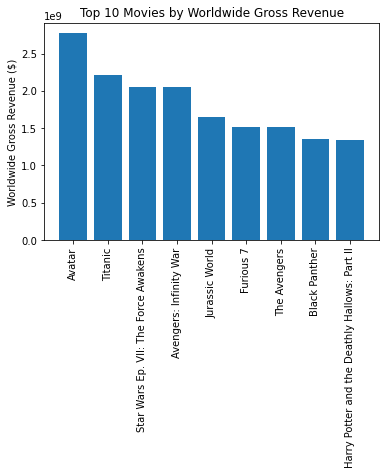

In [26]:
# Sort movies by worldwide gross revenue in descending order
sorted_movies = merged_data.sort_values(by='worldwide_gross', ascending=False)

# Plot top 10 movies by worldwide gross revenue
plt.bar(sorted_movies['movie'][:10], sorted_movies['worldwide_gross'][:10])
plt.xticks(rotation=90)
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Top 10 Movies by Worldwide Gross Revenue')
plt.show()

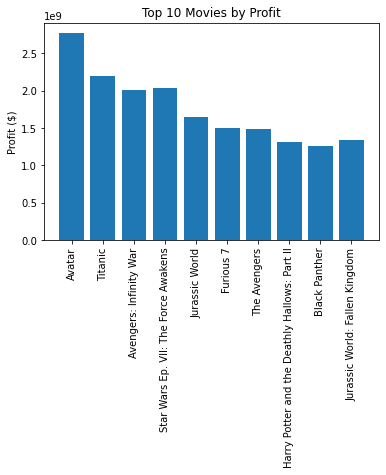

In [27]:
# Sort movies by profit in descending order
sorted_movies2 = merged_data.sort_values(by='profit', ascending=False)

# Plot top 10 movies by profit
plt.bar(sorted_movies2['movie'][:10], sorted_movies['profit'][:10])
plt.xticks(rotation=90)
plt.ylabel('Profit ($)')
plt.title('Top 10 Movies by Profit')
plt.show()

The plots show the top 10 movies by profit and worldwide gross revenue. The movie "Avatar" has the highest profit among all the movies in the dataset with a profit of around 2.7 billion dollars. The other movies in the top 10 are also big blockbusters and have earned a significant profit, ranging from around 1.3 billion dollars to 1 billion dollars. It is evident that the movies that have earned the highest profit have also grossed the most worldwide revenue.

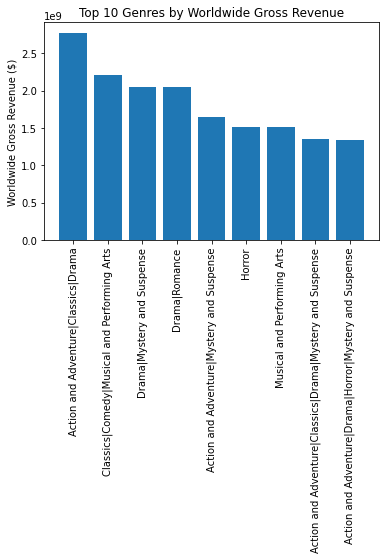

<Figure size 432x288 with 0 Axes>

In [37]:
# Sort genres by worldwide gross revenue in descending order
sorted_genres = merged_data.sort_values(by='worldwide_gross', ascending=False)

# Plot top 10 genres by worldwide gross revenue
plt.bar(sorted_genres['genre'][:10], sorted_movies['worldwide_gross'][:10])
plt.xticks(rotation=90)
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Top 10 Genres by Worldwide Gross Revenue')
plt.show()

plt.savefig('my_graph.png')


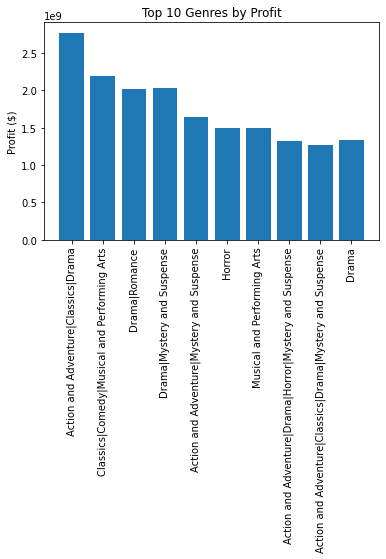

In [29]:
# Sort genres by profit in descending order
sorted_genres2 = merged_data.sort_values(by='profit', ascending=False)

# Plot top 10 genres by worldwide gross revenue
plt.bar(sorted_genres2['genre'][:10], sorted_movies['profit'][:10])
plt.xticks(rotation=90)
plt.ylabel('Profit ($)')
plt.title('Top 10 Genres by Profit')
plt.show()

The bargraphs show that the "Action and Adventure" genre has the highest profit and grossed the highest revenue worldwide, followed by "Drama," "Comedy," "Animation," and "Fantasy." The profits for the other genres in the top 10 are relatively low compared to these top five genres.

## Vote average rating analysis

We can calculate some basic statistics for the vote average column. We can use the describe() method to get the count, mean, standard deviation, minimum, and maximum values, as well as the quartile values.

In [30]:
vote_stats = merged_data['vote_average'].describe()
print(vote_stats)


count    1922.000000
mean        6.212643
std         1.182037
min         0.000000
25%         5.600000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64


From the above output, we can see that the average votes for the movies in the dataset is 6.21, with a standard deviation of 1.18. The minimum rating is 0, and the maximum rating is 10.0. The median rating (50th percentile) is 6.3, and the 25th and 75th percentiles are 5.6 and 6.9, respectively.

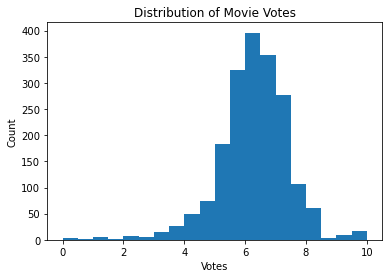

In [31]:
# Lets take a look at the visualization 
plt.hist(merged_data['vote_average'], bins=20)
plt.xlabel('Votes')
plt.ylabel('Count')
plt.title('Distribution of Movie Votes')
plt.show()


We then can group the movies by genre and calculate the mean vote rating for each genre.

In [32]:
genre_ratings = merged_data.groupby('genre')['vote_average'].mean()
print(genre_ratings)


genre
Action and Adventure                                                     6.394737
Action and Adventure|Art House and International|Drama                   6.278125
Action and Adventure|Classics|Drama                                      5.965854
Action and Adventure|Classics|Drama|Mystery and Suspense                 6.350000
Action and Adventure|Comedy|Drama                                        6.286667
Action and Adventure|Comedy|Mystery and Suspense                         5.977273
Action and Adventure|Drama                                               5.633333
Action and Adventure|Drama|Horror|Mystery and Suspense                   6.393333
Action and Adventure|Drama|Mystery and Suspense                          6.120690
Action and Adventure|Drama|Science Fiction and Fantasy                   6.576786
Action and Adventure|Drama|Western                                       6.191304
Action and Adventure|Mystery and Suspense                                6.641463
Action and

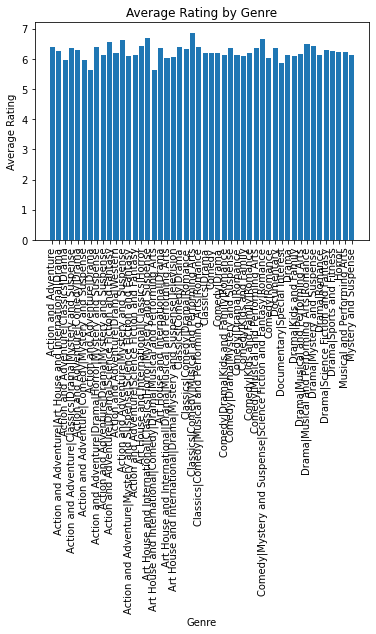

In [33]:
# Let us take a look at the visualization
plt.bar(genre_ratings.index, genre_ratings.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.show()


We observe that Action, Adventure, Drama and Comedy also have a relatively good rating and votes together with having better revues and profits these genre are more likely to be successful in the movie industry.

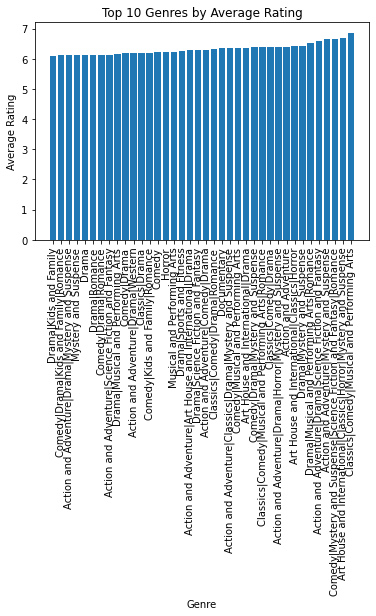

<Figure size 432x288 with 0 Axes>

In [38]:
# Sort genres by average rating in descending order
sorted_genres = genre_ratings.sort_values()
# Plot top 10 genres by average rating
plt.bar(sorted_genres.index[10:], sorted_genres.values[10:])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.show()

plt.savefig('my_graph.png')


## Conclusion




From the analysis we have done from the datasets we can conclude that:

1. Adventure, Action, and Drama are the top three most profitable genres in the film industry.
2. Films with a higher worldwide gross revenue are likely to have a higher profit margin.
3. Films with a higher rating tend to have a higher profit margin.

## Next steps

The next steps the Microsft film producer could take include:

1. Consider investing in the production of adventure, action, and drama films as they have proven to be the most profitable genres.
2. Invest in films with high potential for worldwide gross revenue can yield a higher profit margin.
3. Producing films with a high rating can lead to a higher profit margin, so Microsoft should strive to create high-quality films that appeal to audiences and critics alike.